## Scenario 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. 
But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. 
As a friend, you want to help your friend deciding the location. 
NCR include Gurgaon, Noida and New Delhi. 
Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. 
Take city name as "Bangalore". 
For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

### What we need to do.

1. 3 location - Bangalore, Mumbai, NCR(New Delhi, Gurgaon, Noida)

2. Location where most number of funding is done (Number of times).

3. Plot bar graph b/w location and no. of times.

4. 'Delhi' -> 'New Delhi'; 'bangalore' -> 'Bangalore' 
   Handle multiple cities case as well.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Correcting the spelling mistakes of Major Indian Cities and handling the case of null values in city location

In [57]:
df.CityLocation.fillna('', inplace = True)
df.CityLocation.replace('Delhi', 'New Delhi', inplace = True)
df.CityLocation.replace('bangalore', 'Bangalore', inplace = True)


### Collecting all the cities in an array

In [67]:
def getIndianCity(string):
    return string.split('/')[0].strip()

df.CityLocation = df.CityLocation.apply(getIndianCity)

city = np.array(df.CityLocation)
print(len(city))

2372


### Number of fundings in each desired city stored in a dictionary

In [68]:
city_fundings_frequency = {}
for i in city:
    if(i == 'Bangalore' or i == 'Mumbai'):
        city_fundings_frequency[i] = city_fundings_frequency.get(i, 0) + 1
    elif(i == 'New Delhi' or i == 'Gurgaon' or i == 'Noida'):
        city_fundings_frequency['NCR'] = city_fundings_frequency.get('NCR', 0) + 1

ans = sorted(city_fundings_frequency.items(), key = lambda x : x[1], reverse = True)
ans

[('NCR', 709), ('Bangalore', 635), ('Mumbai', 449)]

### Printing the values and creating an array for both city and number of fundings which are needed for the bar graph

In [69]:
cities = []
fundings = []
for i in ans:
    cities.append(i[0])
    fundings.append(i[1])
    
for i in range(len(cities)):
    print(cities[i], fundings[i])

NCR 709
Bangalore 635
Mumbai 449


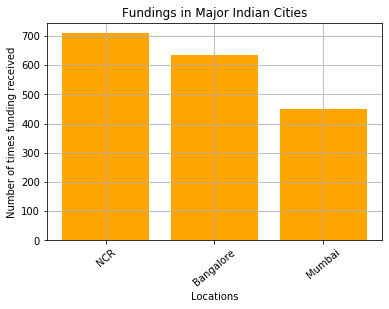

In [70]:
plt.bar(cities, fundings, color = 'Orange')
plt.xlabel("Locations")
plt.ylabel("Number of times funding received")
plt.title("Fundings in Major Indian Cities")
plt.xticks(rotation = 40)
plt.grid()
plt.show()